- 구글 드라이브 연결

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 데이터 경로 변수

In [1]:
#DATA_PATH = "/content/drive/MyDrive/data/"
import os 

DATA_PATH=os.getcwd()+'/data/'

- 시드값

In [2]:
SEED = 42

- 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np

train = pd.read_csv(f"{DATA_PATH}titanic_train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}titanic_test.csv") # 테스트 데이터
train.shape , test.shape

((916, 12), (393, 11))

In [4]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
1,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S
3,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S


- 결측치 확인하기

In [5]:
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age            180
sibsp            0
parch            0
ticket           0
fare             0
cabin          706
embarked         0
dtype: int64

In [6]:
test.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age             83
sibsp            0
parch            0
ticket           0
fare             1
cabin          308
embarked         2
dtype: int64

- 학습 데이터에서 얻은 통계량을 이용하여 결측치를 채워야한다.

In [7]:
age_mean = train["age"].mean()
fare_median = train["fare"].median()
cabin_unk = "UNK"
embarked_mode = train["embarked"].mode()[0]
age_mean , fare_median ,cabin_unk , embarked_mode

(29.904891304347824, 14.5, 'UNK', 'S')

- 학습데이터 결측치 처리

In [8]:
train["age"] = train["age"].fillna(age_mean)
train["cabin"] = train["cabin"].fillna(cabin_unk)

- 테스트데이터 결측치 처리

In [9]:
test["age"] = test["age"].fillna(age_mean)
test["fare"] = test["fare"].fillna(fare_median)
test["cabin"] = test["cabin"].fillna(cabin_unk)
test["embarked"] = test["embarked"].fillna(embarked_mode)

In [10]:
train.isnull().sum().sum() , test.isnull().sum().sum()

(0, 0)

- 특성으로 사용할 변수 추가하기

In [11]:
cols = ["age","sibsp","parch","fare","pclass","gender","embarked"]
train_ft = train[cols].copy()
test_ft = test[cols].copy()
train_ft.shape, test_ft.shape

((916, 7), (393, 7))

- 범주형 변수 원핫인코딩하여 특성으로 추가하기

In [12]:
from sklearn.preprocessing import OneHotEncoder
cols = ['gender','embarked']
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train[cols])

OneHotEncoder(handle_unknown='ignore')

In [13]:
# 학습 데이터
tmp = pd.DataFrame(
    enc.transform(train_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
train_ft = pd.concat([train_ft,tmp],axis=1)
train_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,71.0,0,0,49.5042,1,male,C,0.0,1.0,1.0,0.0,0.0
1,34.0,0,0,8.0500,3,male,S,0.0,1.0,0.0,0.0,1.0
2,29.0,3,1,22.0250,3,male,S,0.0,1.0,0.0,0.0,1.0
3,18.0,1,1,13.0000,2,female,S,1.0,0.0,0.0,0.0,1.0
4,48.0,0,0,26.5500,1,male,S,0.0,1.0,0.0,0.0,1.0


In [14]:
# 테스트 데이터
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft,tmp],axis=1)
test_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,62.000000,0,0,26.5500,1,male,S,0.0,1.0,0.0,0.0,1.0
1,28.000000,0,0,47.1000,1,male,S,0.0,1.0,0.0,0.0,1.0
2,24.000000,0,0,9.5000,3,male,S,0.0,1.0,0.0,0.0,1.0
3,29.904891,0,0,7.7333,3,female,Q,1.0,0.0,0.0,1.0,0.0
4,18.500000,0,0,7.2833,3,female,Q,1.0,0.0,0.0,1.0,0.0


- 문자열 데이터 제거

In [15]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

- Min-Max Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [17]:
train_ft[train_ft.columns] = scaler.transform(train_ft)
train_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,0.887260,0.000,0.000000,0.096626,0.0,0.0,1.0,1.0,0.0,0.0
1,0.423776,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,1.0
2,0.361142,0.375,0.111111,0.042990,1.0,0.0,1.0,0.0,0.0,1.0
3,0.223350,0.125,0.111111,0.025374,0.5,1.0,0.0,0.0,0.0,1.0
4,0.599148,0.000,0.000000,0.051822,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
test_ft[test_ft.columns] = scaler.transform(test_ft)
test_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,0.774521,0.0,0.0,0.051822,0.0,0.0,1.0,0.0,0.0,1.0
1,0.348616,0.0,0.0,0.091933,0.0,0.0,1.0,0.0,0.0,1.0
2,0.298509,0.0,0.0,0.018543,1.0,0.0,1.0,0.0,0.0,1.0
3,0.372478,0.0,0.0,0.015094,1.0,1.0,0.0,0.0,1.0,0.0
4,0.229613,0.0,0.0,0.014216,1.0,1.0,0.0,0.0,1.0,0.0


- 정답 데이터

In [19]:
target = train["survived"]
target

0      0
1      0
2      0
3      1
4      1
      ..
911    1
912    0
913    0
914    0
915    0
Name: survived, Length: 916, dtype: int64

# Bayesian optimization
- 매 회 새로운 하이퍼파라미터 조합에 대한 조사를 수행할 경우 사전 지식을 충분히 반영하면서 전체적인 탐색 과정을 체계적으로 수행하는 튜닝 방법
- 미지의 목적 함수에 대하여 최대 또는 최소로 하는 반환 값을 만드는 최적 입력값을 탐색하는 방법
- 새로운 데이터를 입력 받았을 때 목적 함수를 근사화 하는 최적 함수를 추정하는 대체 모델을 개선해 나가면서 최적 함수를 만듦
- 대체 모델(Surrogate Model)
    - 획득 함수로부터 최적 함수를 추정할 수 있는 최적 입력값을  받아 이를 기반으로 최적 함수를 개선해 나가며 추정
- 획득 함수(Acquisition Function)
    - 개선된 대체 모델이 추정한 최적 함수
    - 최적 입력값을 계산
- 베이지안 최적화를 이용한 하이퍼파라미터 튜닝을 적용할 수 있는
파이썬 라이브러리
    - Optuna, HyperOpt, Bayesian Optimization











## Bayesian optimization 튜닝 과정

- step1
    - 최초에는 랜덤하게 하이퍼파라미터들을 샘플링하여
성능 지표 결과값들을 관측

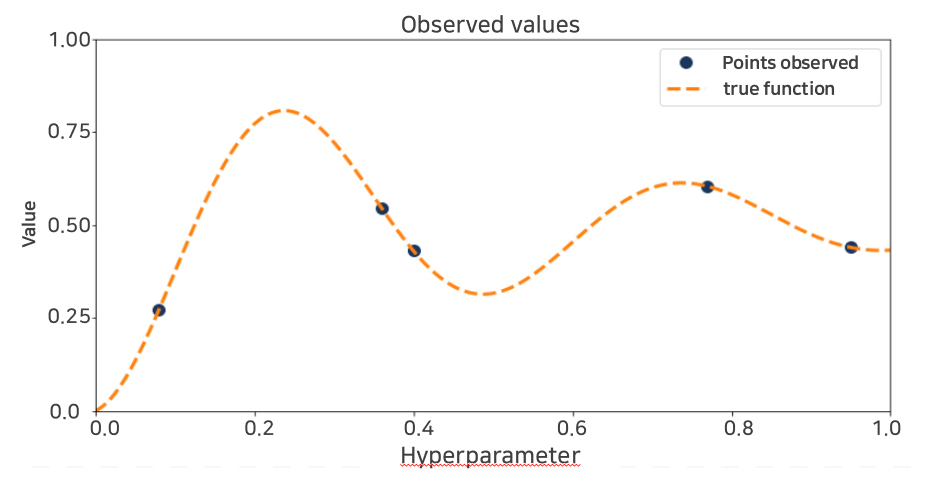

- step2
    - 관측된 데이터를 기반으로 대체 모델을 이용하여 목적 함수를
근사화 하는 최적 함수를 추정

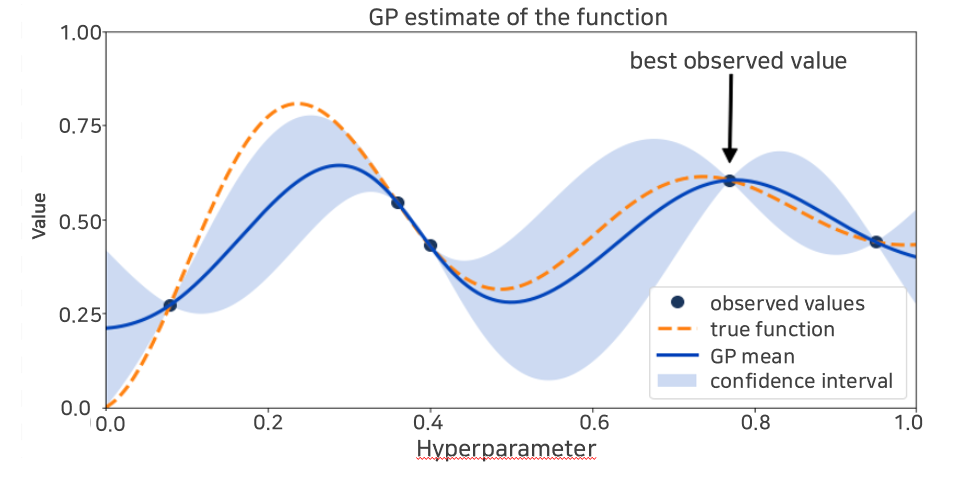

- step3
    - 추정된 최적 함수를 기반으로 획득 함수는 다음으로 관측할 하이퍼파라미터 값을 계산
    - 이전의 최적 관측값보다 더 큰 최대값을 가질 가능성이 높은 지점의 하이퍼파라미터를 대체 모델에 전달



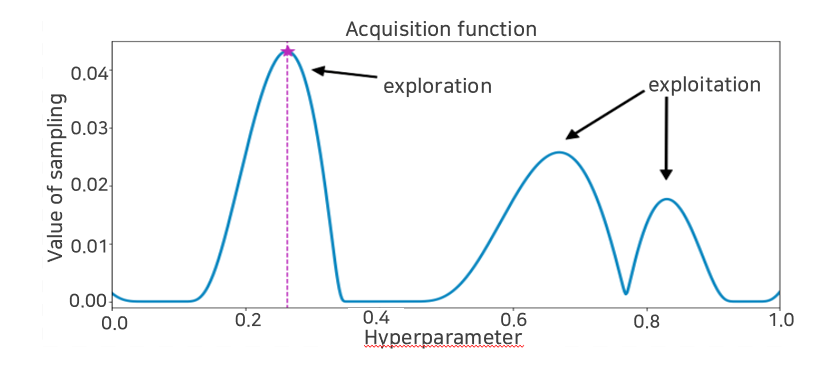

- step4
    - 획득 함수로부터 샘플링된 하이퍼파라미터를 수행하여 관측된 값을 기반으로 대체모델은 갱신되어 다시 최적 함수를 추정
    - Step 3와 Step 4를 지정한 횟수만큼 반복


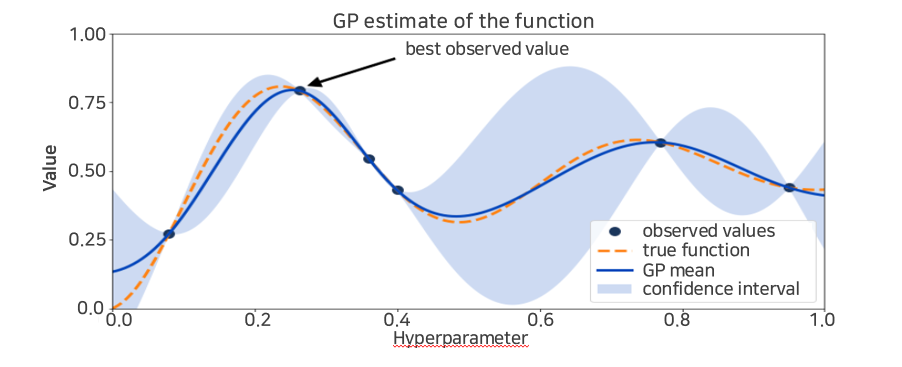

## optuna
- 베이지안 최적화 방식의 하이퍼파라미터 튜닝을 적용할 수 있는 파이썬 라이브러리
- https://optuna.readthedocs.io/en/stable/index.html
-  설치 방법
```python
pip install optuna
```

In [20]:
!pip install optuna

  Using cached optuna-3.6.1-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.13.2-py3-none-any.whl.metadata (7.4 kB)
  Using cached colorlog-6.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached Mako-1.3.5-py3-none-any.whl.metadata (2.9 kB)
Using cached optuna-3.6.1-py3-none-any.whl (380 kB)
Using cached alembic-1.13.2-py3-none-any.whl (232 kB)
Using cached colorlog-6.8.2-py3-none-any.whl (11 kB)
Using cached Mako-1.3.5-py3-none-any.whl (78 kB)


## optuna 를 이용한 하이퍼파라미터 튜닝방법
1. 목적함수를 만든다.
    - optuna 에서는 목적함수에 trial 객체를 전달
    - trial 객체의 suggest 메서드를 이용하여 하이퍼 파라미터를 세팅
    - trial 객체의 suggest 메서드가 사전지식을 반영하여 하이퍼파라미터를 제안
    - 모델학습및 검증평가 결과를 반환
2. 대체모델 역할을 할 Sampler 객체를 생성
3. 전체적인 튜닝과정을 진행하는 스터디 객체 생성하여 optimize 메서드로 튜닝시작

In [21]:
import optuna

In [22]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

- 목적함수 만들기

### Optuna의 `suggest_float`, `suggest_int`, `suggest_categorical`

#### 1. `suggest_float`
- **설명**: 연속적인 실수(float) 값을 샘플링합니다.
- **용도**: 특정 범위 내에서 실수형 하이퍼파라미터를 최적화할 때 사용합니다.
- **예시**:
  ```python
  learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)

In [23]:
optuna.trial.Trial.suggest_float

<function optuna.trial._trial.Trial.suggest_float(self, name: 'str', low: 'float', high: 'float', *, step: 'Optional[float]' = None, log: 'bool' = False) -> 'float'>

#### 1. `suggest_int`
- **설명**: 특정 범위 내에서 정수(int) 값을 샘플링합니다.
- **용도**: 정수형 하이퍼파라미터(예: 결정 트리의 최대 깊이, k-최근접 이웃 알고리즘의 k 값 등)를 최적화할 때 사용합니다.
- **예시**:
  ```python
  num_layers = trial.suggest_int('num_layers', 1, 5)

In [24]:
optuna.trial.Trial.suggest_int

<function optuna.trial._trial.Trial.suggest_int(self, name: 'str', low: 'int', high: 'int', *, step: 'int' = 1, log: 'bool' = False) -> 'int'>

#### 1. `suggest_categorical`
- **설명**: 미리 정의된 범주형 값들 중 하나를 샘플링합니다.
- **용도**: 선택지가 정해져 있는 범주형 하이퍼파라미터(예: 활성화 함수의 유형, 모델의 종류 등)를 최적화할 때 사용합니다
- **예시**:
  ```python
  optimizer = trial.suggest_categorical('optimizer', ['sgd', 'adam', 'rmsprop'])

In [25]:
optuna.trial.Trial.suggest_categorical

<function optuna.trial._trial.Trial.suggest_categorical(self, name: 'str', choices: 'Sequence[CategoricalChoiceType]') -> 'CategoricalChoiceType'>

- 다음의 함수는 전역 변수를 함수 내부에서 사용하는 문제가 있음
- 나중에 시간 되면 클래스로 구현하여 목적함수로 만들어 해결해 보세요.

In [26]:
def objective(trial):
    hp = {
        "n_estimators": trial.suggest_int("n_estimators", 80, 250) ,
        "criterion" : trial.suggest_categorical("criterion", ["gini", "entropy"] ) ,
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None] )
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
    model = RandomForestClassifier(random_state=SEED, **hp)
    scores = cross_val_score(model, train_ft, target, cv=cv, scoring="roc_auc", n_jobs=-1)
    return scores.mean()

- sampler 객체와 study 객체 생성후 튜닝 시작!

In [27]:
sampler = optuna.samplers.TPESampler(seed=SEED) # Tree-Structured Parzen Estimator
study = optuna.create_study(direction="maximize", sampler=sampler) # direction 파라미터는 평가지표에 따라 maximize, minimize

# 튜닝 시작
study.optimize(objective, n_trials=50)

[I 2024-08-16 21:01:38,846] A new study created in memory with name: no-name-19786835-53f5-45bd-852e-1e88e5e102e2
[I 2024-08-16 21:01:40,367] Trial 0 finished with value: 0.9021876576369428 and parameters: {'n_estimators': 144, 'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 4, 'max_features': None}. Best is trial 0 with value: 0.9021876576369428.
[I 2024-08-16 21:01:41,438] Trial 1 finished with value: 0.9135523040367891 and parameters: {'n_estimators': 182, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 17, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9135523040367891.
[I 2024-08-16 21:01:42,477] Trial 2 finished with value: 0.9106241540175015 and parameters: {'n_estimators': 132, 'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 13, 'max_features': None}. Best is trial 1 with value: 0.9135523040367891.
[I 2024-08-16 21:01:43,398] Trial 3 finished with value: 0.9134495345891344 and parameters: {'n_estimators': 157, 'criterion': 'gini', 'max_de

In [28]:
study.best_value # 최적의 하이퍼파라미터 조합의 검증 점수

0.9162408095358433

In [29]:
study.best_params # 탐색한 최적의 하이퍼파라미터 조합

{'n_estimators': 102,
 'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_split': 20,
 'max_features': 'sqrt'}

- 하이퍼파라미터 중요도

In [30]:
optuna.visualization.plot_param_importances(study)

- 탐색 과정에서 모든 시도에 대한 history

In [31]:
optuna.visualization.plot_optimization_history(study)

- 튜닝이 완료되면 최적의 하이퍼파라미터 조합으로 모델객체 생성후 학습

In [32]:
model = RandomForestClassifier(random_state=SEED, **study.best_params)
model.fit(train_ft,target)

RandomForestClassifier(criterion='entropy', max_depth=13, min_samples_split=20,
                       n_estimators=102, random_state=42)

In [33]:
pred = model.predict_proba(test_ft)[:,1]
pred

array([0.27382469, 0.19367161, 0.04288819, 0.87531551, 0.83110202,
       0.43694266, 0.14744091, 0.38251614, 0.60164612, 0.89529186,
       0.05238586, 0.87406409, 0.87303   , 0.89788958, 0.57349179,
       0.05391748, 0.0820674 , 0.00301104, 0.96731354, 0.02841552,
       0.1602786 , 0.1525661 , 0.87548089, 0.05386838, 0.11685536,
       0.1562488 , 0.04982971, 0.1230162 , 0.1335321 , 0.14892977,
       0.69114409, 0.69159273, 0.43398587, 0.07151652, 0.71136144,
       0.17102654, 0.97927394, 0.1335321 , 0.08011491, 0.03545447,
       0.00722716, 0.4644767 , 0.16667639, 0.00936049, 0.09904069,
       0.09711297, 0.07000364, 0.0488381 , 0.05270138, 0.96643418,
       0.17901222, 0.07418214, 0.67913478, 0.01162931, 0.09904069,
       0.90160822, 0.56009841, 0.19790587, 0.94631281, 0.02974585,
       0.02570013, 0.04899652, 0.32559913, 0.89487444, 0.01673221,
       0.98849132, 0.07000364, 0.09683201, 0.52885683, 0.00832831,
       0.09976174, 0.06738778, 0.01272191, 0.98056566, 0.22652